## 문제 정의
- 모델링에서 가장 적합한 분포는 정규 분포이나, 실제로 많은 변수가 특정 방향으로 치우쳐 있음
- 한 쪽으로 치우친 변수에서 치우친 반대 방향의 값 (꼬리 부분)들이 이상치처럼 작용할 수 있으므로, 이러한 치우침을 제거해야 함
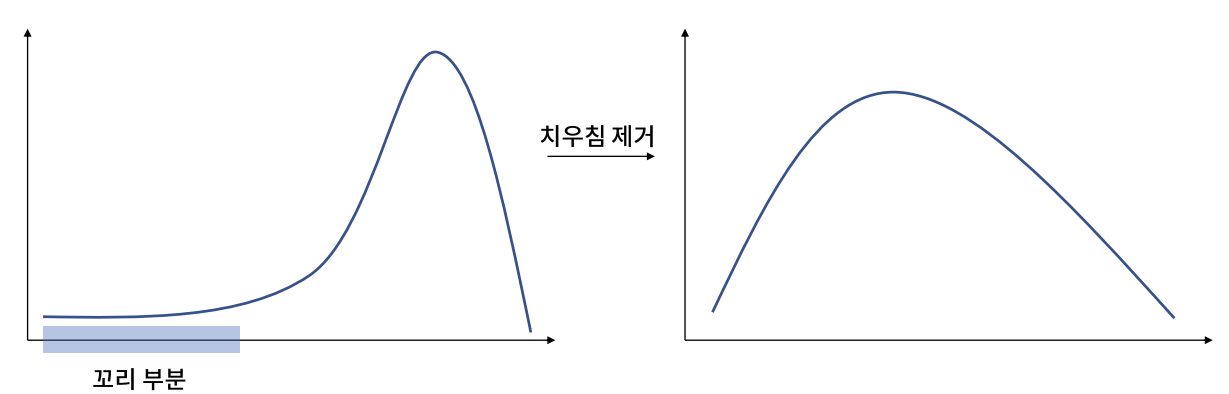

## 탐색 방볍: 왜도(skewness)
- 왜도는 분포의 비대칭도를 나타내는 통계량으로, 왜도 값에 따른 분포는 다음과 같다.
- 보통 왜도의 절대값이 1.5 이상이면 치우쳤다고 판단함
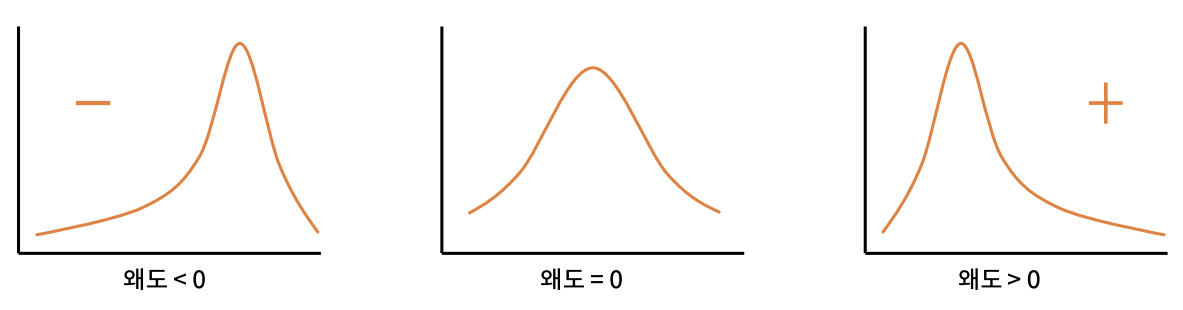

### scipy.stats
- scipy.stats.mode: 최빈값을 구하는 함수
- scipy.stats.skew: 왜도를 구하는 함수
- scipy.stats.kurtosis: 첨도를 구하는 함수

## 해결 방안
- 변수 치우침을 해결하는 기본 아이디어는 값 간 차이를 줄이는데 있다.
- 대표적인 처리 방법은 다음과 같다.
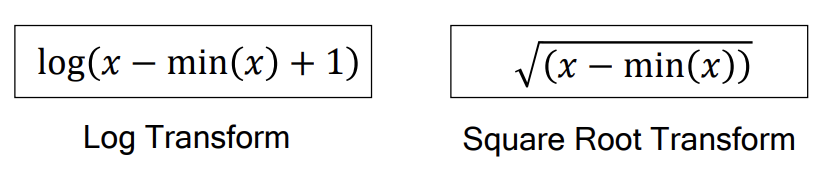

In [40]:
import os
import pandas as pd
os.chdir(r'C:\Users\신상훈\Desktop\preprocessing\part-5.-머신러닝-모델의-성능-향상을-위한-전처리\5. 머신러닝 모델의 성능 향상을 위한 전처리\데이터')

In [41]:
df = pd.read_csv('Sonar_Mines_Rocks.csv')

In [42]:
df.head()

,Band1,Band2,Band3,Band4,Band5,Band6,Band7,Band8,Band9,Band10,...,Band52,Band53,Band54,Band55,Band56,Band57,Band58,Band59,Band60,Y
0,0.020,0.037,0.043,0.021,0.095,0.099,0.154,0.160,0.311,0.211,...,0.003,0.006,0.016,0.007,0.017,0.018,0.008,0.009,0.003,R
1,0.045,0.052,0.084,0.069,0.118,0.258,0.216,0.348,0.334,0.287,...,0.008,0.009,0.005,0.009,0.019,0.014,0.005,0.005,0.004,R
2,0.026,0.058,0.110,0.108,0.097,0.228,0.243,0.377,0.560,0.619,...,0.023,0.017,0.010,0.018,0.024,0.032,0.016,0.010,0.008,R
3,0.010,0.017,0.062,0.020,0.020,0.037,0.110,0.128,0.060,0.126,...,0.012,0.004,0.015,0.008,0.007,0.005,0.004,0.004,0.012,R
4,0.076,0.067,0.048,0.039,0.059,0.065,0.121,0.247,0.356,0.446,...,0.003,0.005,0.010,0.011,0.002,0.007,0.005,0.011,0.009,R


In [43]:
# 특징과 라벨 분리
X = df.drop('Y',axis = 1)
Y = df['Y']

In [44]:
# 학습 데이터와 평가 데이터로 분리
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X,Y)

In [45]:
Train_X.shape

(156, 60)

In [46]:
Train_X.skew() # 왜도 확인 => Band4의 왜도가 가장 큼 => 어떻게 생겼는지 확인

Band1     2.179716
Band2     1.347600
Band3     2.145041
Band4     2.101244
Band5     1.618001
Band6     1.339283
Band7     0.988154
Band8     1.400676
Band9     1.630322
Band10    1.325485
Band11    1.000476
Band12    0.572753
Band13    0.756579
Band14    0.869814
Band15    0.872172
Band16    0.811147
Band17    0.752000
Band18    0.616774
Band19    0.395860
Band20   -0.010811
Band21   -0.254776
Band22   -0.430155
Band23   -0.603018
Band24   -0.740666
Band25   -0.789743
Band26   -0.738408
Band27   -0.737355
Band28   -0.710210
Band29   -0.580977
Band30   -0.169256
Band31    0.126506
Band32    0.212915
Band33    0.447311
Band34    0.534445
Band35    0.523471
Band36    0.638394
Band37    0.683351
Band38    0.906852
Band39    0.870765
Band40    0.806215
Band41    0.999670
Band42    0.987275
Band43    0.959947
Band44    1.197522
Band45    1.375858
Band46    1.797297
Band47    1.865175
Band48    1.378366
Band49    1.423522
Band50    1.878586
Band51    2.922830
Band52    2.363579
Band53    1.

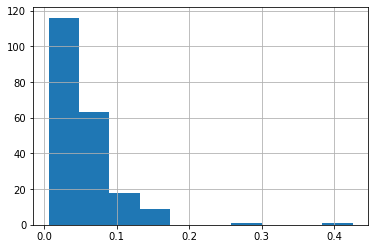

In [47]:
%matplotlib inline
df['Band4'].hist()

#### 치우침을 제거했을 때의 성능 비교를 위한 모델 개발

In [48]:
# 라벨 숫자로 바꾸기
Train_Y.replace({"M":-1, "R":1}, inplace = True)
Test_Y.replace({"M":-1, "R":1}, inplace = True)

In [49]:
# 원본 데이터로 모델링
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier as MLP
model = MLP(random_state = 153, max_iter = 1000).fit(Train_X, Train_Y)
pred_Y = model.predict(Test_X)
score = f1_score(Test_Y, pred_Y)
print(score)

0.8


In [50]:
# 왜도 기반 치우친 변수 제거 
import numpy as np
biased_variables = Train_X.columns[Train_X.skew().abs() > 1.5] # 왜도의 절대값이 1.5 이상인 컬럼만 가져오기

In [53]:
biased_variables

Index(['Band1', 'Band3', 'Band4', 'Band5', 'Band9', 'Band46', 'Band47',
       'Band50', 'Band51', 'Band52', 'Band55', 'Band56', 'Band57', 'Band58',
       'Band59', 'Band60'],
      dtype='object')

In [51]:
# 치우침 제거
Train_X[biased_variables] = Train_X[biased_variables] - Train_X[biased_variables].min() + 1
Train_X[biased_variables] = np.log10(Train_X[biased_variables])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [52]:
# 치우침 제거 후 모델 평가
model = MLP(random_state = 153, max_iter = 1000).fit(Train_X, Train_Y)

# 테스트도 데이터도 같은 방법으로 전처리를 수행
Test_X[biased_variables] = Test_X[biased_variables] - Test_X[biased_variables].min() + 1
Test_X[biased_variables] = Test_X[biased_variables].apply(np.log)

pred_Y = model.predict(Test_X)
score = f1_score(Test_Y, pred_Y)
print(score)

0.717948717948718


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
